# Data Analysis of the Secret Skirmish Solos Event

[Original Reddit Thread](https://www.reddit.com/r/FortniteCompetitive/comments/asa8vy/data_analysis_of_the_secret_skirmish_full/)

I recently discovered that the killfeed for the Secret Skirmish Solos event was broadcasted, so in this thread, I try to present this data in a meaningful way. The hardest part was definitely gathering the data. The killfeed VODs were not saved, so I had to go through Twitch Clips and Myth's stream to manually collect the data. In total, it took me 6 hours to collect everything. It wasn't fun, but someone had to do it.

As a disclaimer, I'm not a stats or data science guy by any means, but I'm trying to get better at it. So, feel free to leave some criticism or suggestions on other data I could present.

# Full Standings

First, I calculated the standings of all the players. I believe that this was shown only for Top 20 and without detail. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('SecretSkirmishKillFeed.csv')
df.head(3)

,Player,KilledBy,Weapon,Distance,Storm Phase,Timestamp,Match,Placed,Kills
0,72hrs,NaN,NaN,NaN,9,NaN,1.0,1,2
1,Armond,72hrs,Shotgun,10.0,9,22:49,1.0,2,7
2,Ghoul,Armond,Rifle,3.0,9,22:40,1.0,3,4


In [4]:
def sort_average_placement(df, ascending=True):
    return df.sort_values('Avg. Placement', ascending=ascending)

def sort_top_kills(df, ascending=False):
    return df.sort_values('Kills', ascending=ascending)

In [5]:
placement_points = {1:3,2:2,3:2,4:1,5:1,6:1,7:1,8:1,9:1,10:1}
kill_points = {0:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:4, 9:5, 10:6, 11:7, 12:8, 13:9, 14:10, 15:11, 16:12}

In [6]:
placements = pd.DataFrame(index = df['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)

In [7]:
for i, row in df.iterrows():
    placements['Kills'][row['Player']] += row['Kills']
    placements['Points'][row['Player']] += kill_points[row['Kills']]
    placements['Kill Points'][row['Player']] += kill_points[row['Kills']]
    if (row['Placed'] < 11):
        placements['Points'][row['Player']] += placement_points[row['Placed']]
        placements['Placement Points'][row['Player']] += placement_points[row['Placed']]
    if (row['Placed']==1):
        placements['Victory Royales'][row['Player']] +=1
placements['Avg. Placement'] = df.groupby('Player')['Placed'].mean()
placements = placements.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
placements.index+=1

In [8]:
placements[0:50]

,index,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
1,Bizzle,12,2,4,17,8,15.833333
2,Saf,11,1,6,20,5,13.833333
3,Vivid,9,1,5,17,4,34.000000
4,Kyzui,8,0,4,12,4,30.000000
5,Pearl,7,1,4,14,3,33.166667
6,Pate1k,7,0,5,16,2,32.000000
7,Tfue,7,0,3,13,4,19.333333
8,Aspect,6,0,5,16,1,40.166667
9,Ronaldo,6,0,3,13,3,31.666667
10,Armond,5,0,3,10,2,28.166667


In [9]:
placements[50:100]

,index,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
51,Punisher,1,0,0,3,1,43.833333
52,Hysteria,1,0,1,3,0,53.666667
53,Tyler15,1,0,1,3,0,54.166667
54,Aipha,1,0,1,3,0,66.166667
55,Dassiren,1,0,1,3,0,71.000000
56,Anthony,1,0,0,2,1,26.333333
57,Legedien,1,0,0,2,1,43.000000
58,ThomDez,1,0,0,1,1,60.833333
59,TriggySoars,0,0,0,6,0,56.000000
60,XXIF,0,0,0,6,0,56.000000


First thing to note is that Saf has more kills and a better avg. placement than Bizzle, the winner. Had Saf gotten 1 more point, he would've won. Just shows how clutch Bizzle's second win was. 

Highest placing EU player: Pate1k (6th). Highest placing controller player: Flossen (39th). Highest placing free agent: Kyzui (4th). Other notable placings are Nickmercs at 90th and Chap at 89th. Ghost members somehow manages to consistently place next to each other. Sean, Aydan, Kayuun, Dmo and Thwifo ranked 63, 64, 66, 67, and 68th, respectively. XXIF and TriggySoars completely tied, so I flipped a coin to decide who gets 59th. XXIF won.

### Avg. Placement

In [10]:
sort_average_placement(placements, ascending=True).head(10)

,index,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
2,Saf,11,1,6,20,5,13.833333
1,Bizzle,12,2,4,17,8,15.833333
37,LeNain,2,0,0,5,2,19.000000
12,Vinny1x,5,0,1,5,4,19.000000
27,MmateosS,3,0,0,4,3,19.333333
7,Tfue,7,0,3,13,4,19.333333
22,Zexrow,3,0,1,7,2,21.166667
20,Psalm,3,0,1,8,2,25.333333
56,Anthony,1,0,0,2,1,26.333333
26,BlooTea,3,0,0,5,3,28.000000


In [11]:
sort_average_placement(placements, ascending=False).head(10)

,index,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
90,Nickmercs,0,0,0,2,0,89.166667
100,Overpeek,0,0,0,0,0,88.833333
89,Chap,0,0,0,2,0,83.333333
61,Slobings,0,0,0,6,0,78.666667
97,OutLit,0,0,0,1,0,78.666667
64,Aydan,0,0,0,5,0,77.666667
96,Povsy,0,0,0,1,0,76.166667
49,Nistic,1,0,1,4,0,76.000000
80,McDonkle,0,0,0,3,0,74.666667
88,Dopaitv,0,0,0,2,0,74.333333


Overall, Saf has the best average placement, averaging 14th place. His landing spot was the oasis close to Westworld. Nickmers had the worst, averaging 89th. He dropped Shifty Shafts rather than Tilted for this entire series, and died to Tocata 3 times early game. Nickmercs, Chap, Slobings, Aydan, and Overpeek never made it past the 2nd circle.

Also, notice how low average placement is not a good indicator of how well you'll place in this format. We will try to fix this by applying another format to the results in a later section.

### Kills

In [12]:
sort_top_kills(placements, ascending=False).head(10)

,index,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
2,Saf,11,1,6,20,5,13.833333
1,Bizzle,12,2,4,17,8,15.833333
3,Vivid,9,1,5,17,4,34.000000
6,Pate1k,7,0,5,16,2,32.000000
8,Aspect,6,0,5,16,1,40.166667
5,Pearl,7,1,4,14,3,33.166667
7,Tfue,7,0,3,13,4,19.333333
9,Ronaldo,6,0,3,13,3,31.666667
4,Kyzui,8,0,4,12,4,30.000000
18,roatdw,3,0,3,11,0,66.500000


Saf wins this category with 20 total kills. Only 3 players did not get a single kill (Lyricen, Overpeek and Dark). 

Notice how 9 of the top 10 killers make it to Top 10 overall. This implies that total kills are a good indicator of how well you'll place in this format.

## Playstyles

We can try to infer the playstyles of the top 20 Players by looking at how their kills are distributed across early, mid, and late-game. In the following graph, black dots represent kills and red dots represent deaths. Each box represents the distribution of kills across storm phases for each player.

In [13]:
top20 = placements['index'].head(20).tolist()
df_20 = df[df['KilledBy'].isin(top20)]
order = dict(zip(top20, range(len(top20))))
df_20['order'] = df_20['KilledBy'].map(order)
df_20 = df_20.sort_values('order')
df_20_d = df[df['Player'].isin(top20)]                      
df_20_d['order'] = df_20_d['Player'].map(order)
df_20_d = df_20_d.sort_values('order')

c:\users\eduar\pycharmprojects\secretskirmishanalysis\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\eduar\pycharmprojects\secretskirmishanalysis\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


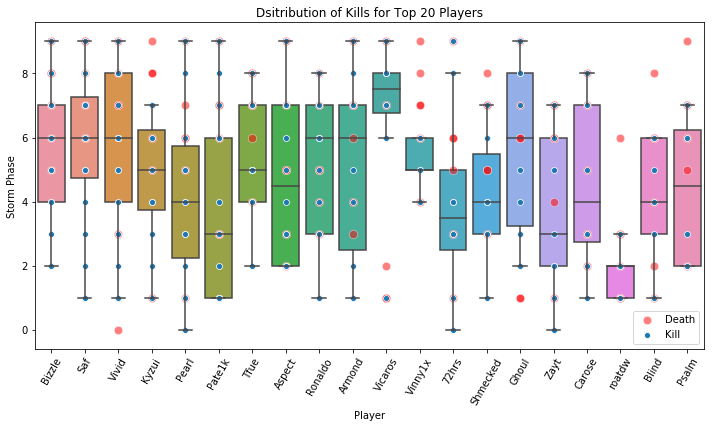

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='KilledBy', y='Storm Phase', ax=ax, data=df_20, showfliers=False)
sns.scatterplot(x='Player', y='Storm Phase', ax=ax, data=df_20_d, color='r', s=70, alpha=0.5,label='Death')
sns.scatterplot(x='KilledBy', y='Storm Phase', ax=ax, data=df_20, label='Kill')
 
ax.tick_params('x', rotation=60)
ax.set_xlabel('Player')
ax.set_ylabel('Storm Phase')
ax.set_title('Dsitribution of Kills for Top 20 Players')
ax.legend(loc='lower right')

Bizzle (17 kills) and Saf (20 kills) consistenly made it to end game and were actively getting kills during all phases of the game. Vivid (17 kills) suffered from 2 early/mid game deaths, putting him behind Saf and Bizzle. Just goes to show the importance of being strong in all 3 phases of the game consistently. 

For example, Vinny1x (5 kills) played purely for late game, with 0 early game kills and 5 total kills overall. His strong late game put him on the board, but it wasn't enough to get top 10.

On the other hand, roatdw had the strongest early game. 9 of his kills were before 3rd circle. He was able to get 18th without a single placement point and only made it to late game once (anyone know where he landed?). As we can see, roatdw's strong early game singlehandely put him in Top 20, but his early deaths prevented him from placing top 10.

Pate1k (16 kills) also went for a lot of early game kills, but, unlike roatdw, managed to survive long enough to get a couple of mid and late-game kills, placing him in 6th place overall.

Vicaros (8 kills) died 4 times in early game without scoring a single point, but his top 3 7-kill game was enough to put him on the board. As they say, all it takes is one game. 

The same could be said about 72hrs (13th). He only made it to top 10 once, the game he won, and didn't do so well for the rest of the tournament.

## Weapons

In [35]:
df_weapon = df.groupby('Weapon')['Distance'].agg(['count', 'max', 'min', 'mean']).sort_values('count', ascending=False)
df_weapon['percent'] = df_weapon['count']/df_weapon['count'].sum()
df_weapon

,count,max,min,mean,percent
Weapon,,,,,
Shotgun,234,16.0,1.0,4.901709,0.426230
Rifle,160,203.0,1.0,34.756250,0.291439
Smg,84,26.0,1.0,5.642857,0.153005
Sniper,32,155.0,11.0,68.250000,0.058288
Pistol,12,242.0,1.0,60.583333,0.021858
Trap,8,6.0,1.0,3.125000,0.014572
Grenade,6,63.0,14.0,28.000000,0.010929
GasGrenade,5,31.0,5.0,20.200000,0.009107
FallDamage,4,60.0,9.0,35.000000,0.007286


#### Fun Facts

- Surprisingly, there was not a single RPG kill, unless somehow RPG counts as a Grenade. 
- roatdw was the player who died to the plane turret. Perhaps, as karma for pushing 72hrs twice with a plane during the pop up cup. 
- Tendons died to InstantEnvironmental?? I don't know what that is, but if I had to guess, it's the storm surge.
- Vinny1x killed himself the most. Died 2 times to FallDamage and once to zone.
- Aspect had the most shotgun kills (11).
- Saf had the most Rifle kills (11).
- Morgausse's only kill was also the farthest kill in the entire tournament (242m pistol kill on Nistic).
- Tfue and Bizzle had the most weapon variety (6 kills with 6 different weapons). 
Bizzle's  weapons: Sniper, Rifle, Shotgun, Smg, FallDamage, Pistol. 
Tfue's weapons: Trap, Shotgun, Rifle, GrenadeLauncher, FallDamage, Smg.
- Poach died twice to Vivid and once to 72hrs.

I also calculated the average kill distance for players with more than 5 kills.

In [62]:
df_dist = df.groupby('KilledBy')['Distance'].agg(['sum', 'count'])
df_dist = df_dist[df_dist['count'] >= 5]
df_dist['Avg. Distance'] = df_dist['sum']/df_dist['count']
df_dist = df_dist['Avg. Distance']
df_dist.sort_values().head(5)

KilledBy
Dvces       4.166667
CBKFlame    4.571429
Slobings    4.666667
Zexrow      5.285714
Ronaldo     5.538462
Name: Avg. Distance, dtype: float64

In [63]:
df_dist.sort_values(ascending=False).head(5)

KilledBy
Aydan        56.200000
Daxor        44.000000
Persecute    43.000000
JTruth       38.833333
Tfue         36.750000
Name: Avg. Distance, dtype: float64

The data makes sense for players like Bizzle and Tfue who usually play for high ground and third party kills.

## Storm Phases

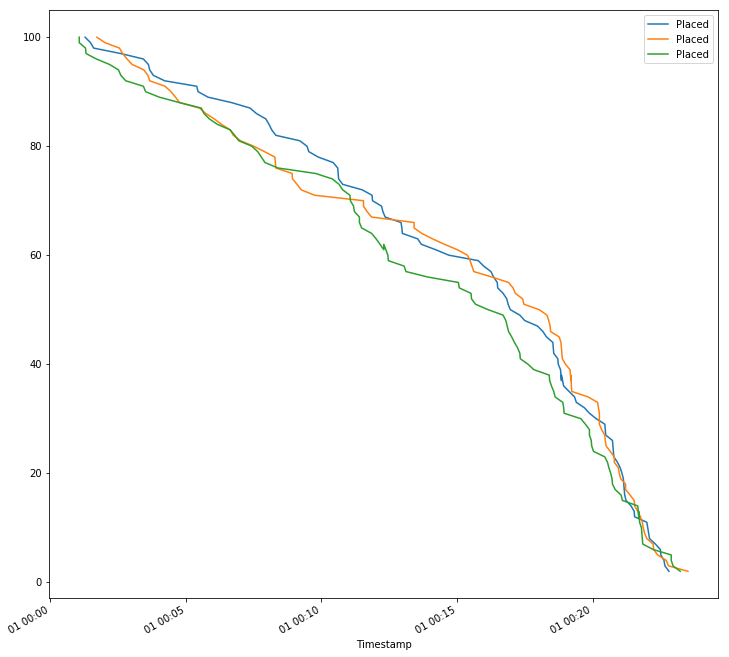

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,12))

m1.plot('Timestamp', 'Placed', kind='line', ax=ax)
m2.plot('Timestamp', 'Placed', kind='line', ax=ax)
m3.plot('Timestamp', 'Placed', kind='line', ax=ax)

Not a lot of interesting info here. The deadliest zone is zone #1. Second deadliest is zone #6. Top 10 usually happens in Zone #7 and Zone #8. In my opinion, it's kind of harsh that a lot of players who make it this far do not get rewarded at all. It takes 20+ minutes to reach Zone #7, yet dying at 11th is equivalent to dying at 100th.

I wanted to create a graph of player count vs. time, but I was not able to get the time data for all the kills. I tried doing player count vs. storm phase, but it turned out pretty ugly and did not show anything meaningful.

## The End

Anyway, that's it for now. I hope some of it was insightful, or at least entertaining. Let me know if there's anything I missed, anything I got wrong or anything else you'd like to see.